# Aprendizaje no supervisado

## 1. Librerias y Datos

In [53]:
import pandas as pd
import numpy as np
import io
import warnings
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
warnings.filterwarnings('ignore')

# Useful functions
from src.utils import load_examples, plot_scatter, plot_silhouette

from sklearn.cluster import KMeans

In [54]:
data = pd.read_csv('data.csv')
data.head()

,Unnamed: 0,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,hotel_Resort Hotel,meal_FB,meal_HB,meal_SC,meal_Undefined,deposit_type_Non Refund,deposit_type_Refundable,reserverd/assigned,customer_type_Group,customer_type_Transient-Party
0,0,0.0,13.077658,2015.0,27.0,1.0,2.0,5.0,2.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1.0,7.389493,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,2,0.0,7.755577,2015.0,27.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,3,0.0,13.077658,2015.0,27.0,1.0,0.0,4.0,2.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,1.0,7.389493,2015.0,27.0,1.0,0.0,2.0,2.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [55]:
x = data.iloc[:,2:26].values
y = data.iloc[:,1].values

## 2. K-means
Vamos a usar k-means para intentar clasificar nuestros datos en dos clusters debido a la variable a predecir (is_canceled).

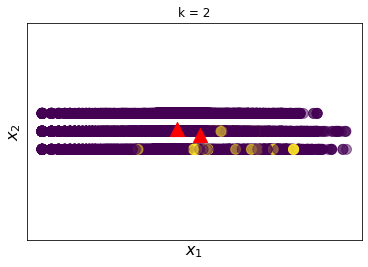

In [58]:
# build the clustering model
k = 2
kmeans = KMeans(n_clusters = k)
kmeans.fit(x)

# Centroids 
centroids = kmeans.cluster_centers_

# Labels
cluster_labels = kmeans.labels_

# do the plotting
plot_scatter(x,'k = ' + str(k), cluster_labels, centroids)
plt.show()

In [59]:
kmeans.predict(x)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [61]:
y

array([0., 1., 0., ..., 0., 1., 0.])

In [60]:
k = 2
kmeans = KMeans(n_clusters=k).fit(x)
kmeans.inertia_

12491575.524048354

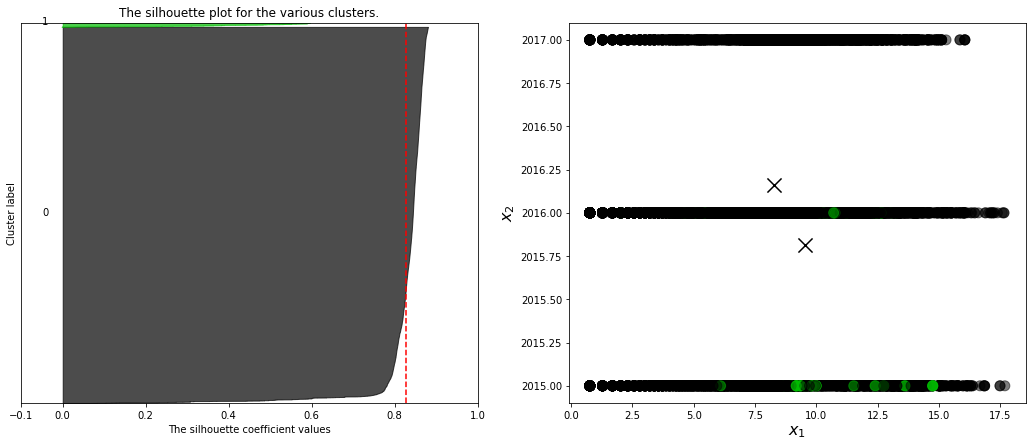

In [62]:
k = 2
kmeans = KMeans(n_clusters=k).fit(x)
plot_silhouette(x,k,kmeans.labels_,kmeans.cluster_centers_)

Se puede ver que no funciona muy bien, ya que obtenemos un inertia muy alto y casi todos los datos pertenecen al mismo grupo.